# Customer Behaviour Analysis

### 1. Customer acquisition by city, source and contact preference:

#### - Analyze the customer source distribution and whether they allow contact by city:

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Load the Excel file
file_path = '/Users/yuanzhiyi/Downloads/Quantitative_Task_-_Data_Analysis_-_Auction.xlsx'
xls = pd.ExcelFile(file_path)

df_demo = pd.read_excel(xls, 'Demographic Info')

# Group by city, contact allowed, and user source channel
city_contact_source_distribution = df_demo.groupby(['Address City', 'Contact Allowed', 'Source of Customer']).size().unstack(fill_value=0)

styled_table = city_contact_source_distribution.head(5).style \
    .set_table_styles([{'selector': 'caption', 'props': [('color', 'black'), ('font-size', '16px')]}]) \
    .background_gradient(cmap='Blues', axis=1) \
    .highlight_max(color='lightgreen', axis=0) \
    .highlight_min(color='lightcoral', axis=0) \
    .set_properties(**{'text-align': 'center'})

# Display the first few rows
styled_table

#### - Calculate the contact allowed rate by source:

Source of Customer  Affiliates    Direct  Organic Search  Paid Search  \
Contact Allowed                                                         
N                     0.405377  0.418948         0.42612      0.43633   
Y                     0.594623  0.581052         0.57388      0.56367   

Source of Customer  Paid Social  
Contact Allowed                  
N                      0.423104  
Y                      0.576896  


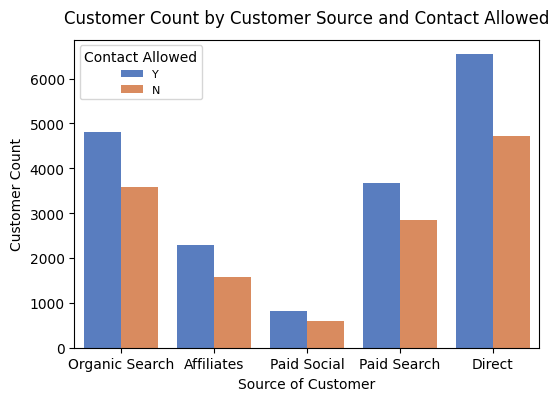

In [13]:
contact_source_distribution = df_demo.groupby(['Contact Allowed', 'Source of Customer']).size().unstack(fill_value=0)

contact_rate = contact_source_distribution.apply(lambda x: x / x.sum(), axis=0)

print(contact_rate)

# Grouped Bar Chart
plt.figure(figsize=(6, 4))
sns.countplot(x='Source of Customer', hue='Contact Allowed', data=df_demo, palette='muted')

plt.title('Customer Count by Customer Source and Contact Allowed', fontsize=12, pad=12)
plt.xlabel('Source of Customer', fontsize=10)
plt.ylabel('Customer Count', fontsize=10)
plt.legend(title='Contact Allowed', title_fontsize='10',fontsize=8)

plt.show()

#### - Calculate customer source distribution by city:

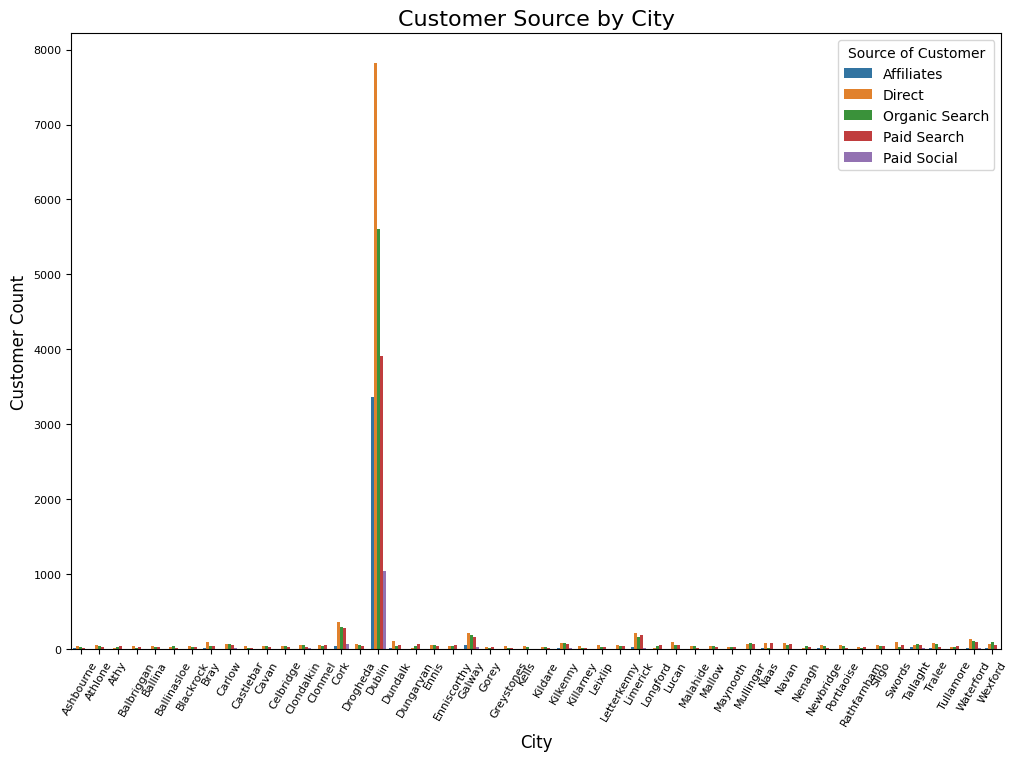

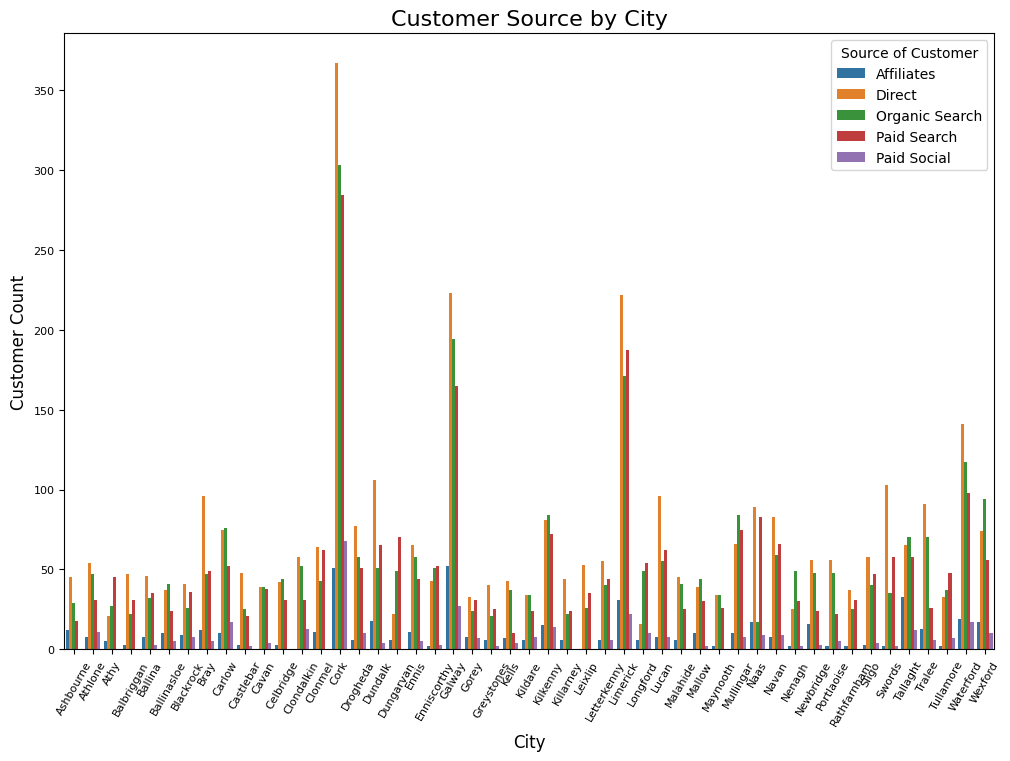

In [11]:
df_grouped_by_city = df_demo.groupby(['Address City','Source of Customer']).size().reset_index(name='Count')

plt.figure(figsize=(12, 8))

# Stacked Column Chart
sns.barplot(x='Address City', y='Count', hue='Source of Customer', data=df_grouped_by_city, errorbar=None)

plt.title('Customer Source by City', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Customer Count', fontsize=12)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xticks(rotation=60)
plt.show()

# Remove data of Dublin for readability
filtered_df_no_dublin = df_demo[df_demo['Address City'] != 'Dublin']

df_no_dublin = filtered_df_no_dublin.groupby(['Address City','Source of Customer']).size().reset_index(name='Count')

plt.figure(figsize=(12, 8))

# Stacked Column Chart
sns.barplot(x='Address City', y='Count', hue='Source of Customer', data=df_no_dublin, errorbar=None)

plt.title('Customer Source by City', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Customer Count', fontsize=12)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xticks(rotation=60)
plt.show()

### 2. Repurchase Behavior (with contact allowed and customer source):

Has Repurchased     False     True 
Contact Allowed                    
N                0.345592  0.654408
Y                0.355168  0.644832


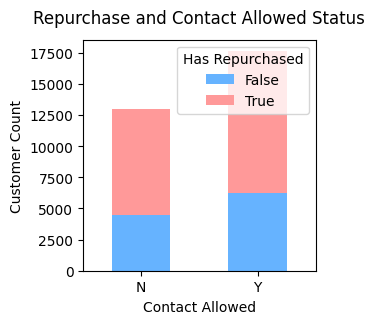

Has Repurchased        False     True 
Source of Customer                    
Affiliates          0.337593  0.662407
Direct              0.353258  0.646742
Organic Search      0.349216  0.650784
Paid Search         0.364337  0.635663
Paid Social         0.321221  0.678779


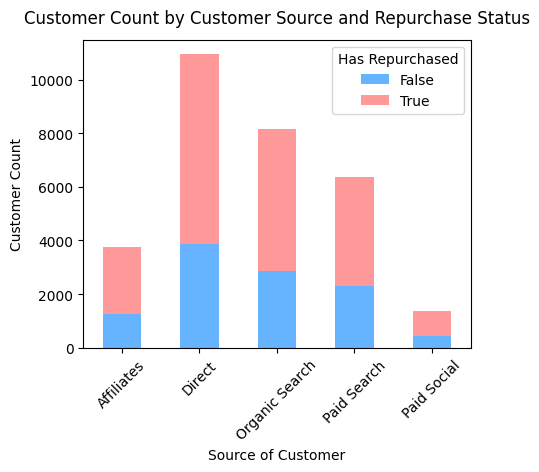

In [15]:
df_value_info = pd.read_excel(xls, 'Value Info')
df_demographic_info = pd.read_excel(xls, 'Demographic Info')

df_merged=df_demographic_info.merge(df_value_info, on='Customer ID')
df_merged['Has Repurchased'] = df_merged['Subsequent Orders Count'] > 0

# Stacked bar chart for repurchase and contact allowed status
repurchase_group = df_merged.groupby(['Contact Allowed', 'Has Repurchased']).size().unstack()

# Calculate the repurchase rate for each 'Contact Allowed' group
repurchase_rate = repurchase_group.apply(lambda x: x / x.sum(), axis=1)

# Display the repurchase rates
print(repurchase_rate)

repurchase_group.plot(kind='bar', stacked=True, figsize=(3, 3), color=['#66b3ff', '#ff9999'])

plt.title('Repurchase and Contact Allowed Status',pad=12)
plt.xlabel('Contact Allowed')
plt.ylabel('Customer Count')
plt.xticks(rotation=0)
plt.show()


# Stacked bar chart for total value of promotions by customer source and repurchase status
df_grouped = df_merged.groupby(['Source of Customer', 'Has Repurchased']).size().unstack()

# Calculate the repurchase rate
repurchase_rate_by_source = df_grouped.apply(lambda x: x / x.sum(), axis=1)

# Display the repurchase rates
print(repurchase_rate_by_source)

df_grouped.plot(kind='bar', stacked=True, figsize=(5, 4), color=['#66b3ff', '#ff9999'])

plt.title('Customer Count by Customer Source and Repurchase Status',pad=12)
plt.ylabel('Customer Count')
plt.xlabel('Source of Customer')
plt.xticks(rotation=45)
plt.show()

### 3. Promotional Usage:

Promotion Used         False     True 
Source of Customer                    
Affiliates          0.301651  0.698349
Direct              0.312677  0.687323
Organic Search      0.300833  0.699167
Paid Search         0.311300  0.688700
Paid Social         0.299419  0.700581


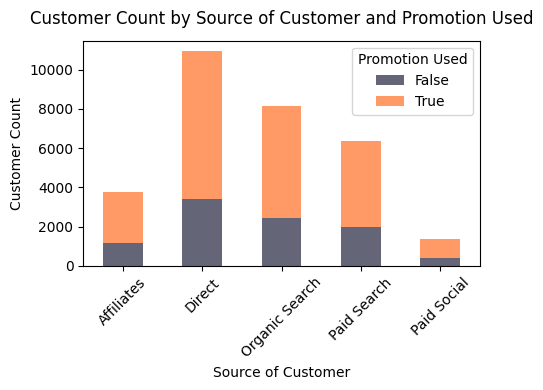

Proportion of users with promotions who allow contact:
Contact Allowed
N    0.423098
Y    0.576902
dtype: float64


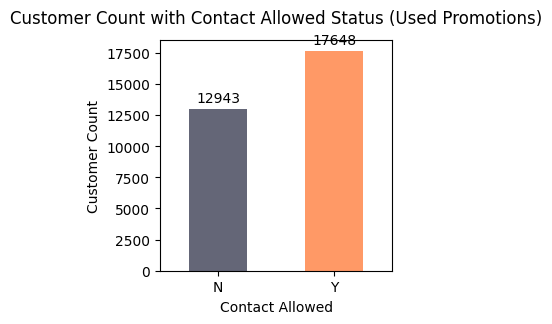

Total users: 31441
Users who allow contact: 18142
Proportion of users who allow contact: 57.70%


In [16]:
df_merged=df_demographic_info.merge(df_value_info, on='Customer ID')

# Create a new column to check if the promotion was used
df_merged['Promotion Used'] = df_merged['Total value of all promotions'] > 0

# Group the data by 'Source of Customer' and 'Promotion Used', and count the number of customers in each group
df_by_source_and_promotion = df_merged.groupby(['Source of Customer', 'Promotion Used']).size().unstack()

# Calculate the promotion used rate
promotion_rate_by_source = df_by_source_and_promotion.apply(lambda x: x / x.sum(), axis=1)

# Display the repurchase rates
print(promotion_rate_by_source)

df_by_source_and_promotion.plot(kind='bar', stacked=True,figsize=(5, 4), color=['#646677', '#ff9966'])

plt.title('Customer Count by Source of Customer and Promotion Used', pad=12)
plt.ylabel('Customer Count')
plt.xlabel('Source of Customer')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Group by 'Contact Allowed' and count the number of customers using promotions
df_promotion_contact = df_merged.groupby(['Contact Allowed']).size()

# Calculate the rate
promotion_rate_by_contact = df_promotion_contact / df_promotion_contact.sum()
print(f"Proportion of users with promotions who allow contact:")
print(promotion_rate_by_contact)

plt.figure(figsize=(3, 3))
ax = df_promotion_contact.plot(kind='bar', color=['#646677', '#ff9966'])

plt.title('Customer Count with Contact Allowed Status (Used Promotions)', pad=12)
plt.ylabel('Customer Count')
plt.xlabel('Contact Allowed')
plt.xticks(rotation=0)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')
plt.show()

# Count total number of users
total_users = df_demographic_info['Contact Allowed'].count()

# Count number of users who allow contact ('Y')
users_allow_contact = df_demographic_info[df_demographic_info['Contact Allowed'] == 'Y']['Contact Allowed'].count()

# Calculate the proportion of users who allow contact
proportion_allow_contact = users_allow_contact / total_users

# Display the result
print(f"Total users: {total_users}")
print(f"Users who allow contact: {users_allow_contact}")
print(f"Proportion of users who allow contact: {proportion_allow_contact:.2%}")

#### - The total promotion value received by customers with and without subsequent orders:

In [17]:
df_merged['Has Subsequent Orders'] = df_merged['Subsequent Orders Count'] > 0

promotion_value_by_group = df_merged.groupby('Has Subsequent Orders')['Total value of all promotions'].mean()

promotion_value_by_group

Has Subsequent Orders
False    1.579540
True     9.130884
Name: Total value of all promotions, dtype: float64

### 4. Summary:
#### - The repurchase rate was similar for customers who allowed contact (64.48%) and those who did not (65.44%).
#### - Paid social and affiliates had the highest repurchase rates (67.9% and 66.2%).
#### - Promotions were effective across the board, regardless of contact permission.
#### - Promotion usage was relatively consistent across different channels.
#### - The total promotion value obtained by customers with repurchase is much higher than that of customers without repurchase.

# High-value Customers

### 1. Find high-value customers excluding promotions:

In [18]:
profit_by_customer = df_demographic_info.merge(df_value_info, on='Customer ID')

# Convert to data format
profit_by_customer.loc[:, 'Date Of Birth'] = pd.to_datetime('1899-12-30') + pd.to_timedelta(profit_by_customer['Date Of Birth'], unit='D')

# Calculate 'Age'
today = datetime.today()
profit_by_customer.loc[:, 'Age'] = (today - profit_by_customer['Date Of Birth']).dt.days // 365

# Calculate total profit by customer
profit_by_customer['Total Profit by customer'] = profit_by_customer['1st Order Profit'] + profit_by_customer['Subsequent Order Profit']

# Sort the result
profit_by_customer_sorted = profit_by_customer.sort_values(by='Total Profit by customer', ascending=False)

# Calculate the count of top 10% of users
top_10_percent_count = int(len(profit_by_customer_sorted) * 0.10)

# Get top 10%
high_value_customers = profit_by_customer_sorted.head(top_10_percent_count)

# Display
high_value_customers[['Customer ID','Age','Contact Allowed','Source of Customer','Total Profit by customer','Subsequent Orders Count']].head(5)

,Customer ID,Age,Contact Allowed,Source of Customer,Total Profit by customer,Subsequent Orders Count
29872,30704,57,Y,Organic Search,415.83168,19
8979,9230,47,Y,Organic Search,404.76672,19
4973,5112,66,Y,Organic Search,401.30000,19
19361,19900,59,Y,Direct,386.17920,24
18837,19362,60,Y,Organic Search,382.21920,16


#### - Plot the distribution of subsequent order quantities for high-value customers:

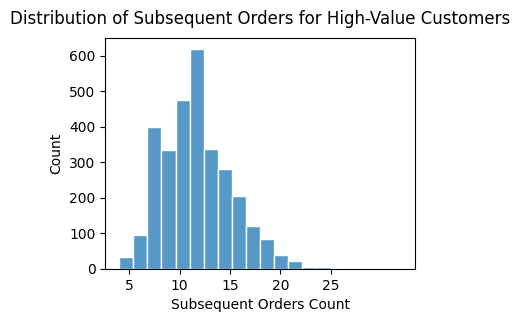

In [27]:
plt.figure(figsize=(4, 3))
sns.histplot(high_value_customers['Subsequent Orders Count'], bins=20, kde=False, edgecolor='white')
plt.title('Distribution of Subsequent Orders for High-Value Customers',pad=10)
plt.xlabel('Subsequent Orders Count')
plt.ylabel('Count')
plt.xticks([5, 10, 15, 20, 25])
plt.show()

#### - Check the percentage of high-value users using promotions:

In [38]:
promotions_used = high_value_customers[high_value_customers['Total value of all promotions'] > 0]

total_high_value_customers = high_value_customers.shape[0]

num_promotions_used = promotions_used.shape[0]

promotion_usage_rate = num_promotions_used / total_high_value_customers * 100

print(f"Percentage of high-value customers who used promotions: {promotion_usage_rate:.2f}%.")

# Calculate the percentage of all users who used promotions
all_users_used_promotions = df_merged[df_merged['Total value of all promotions'] > 0]

total_users = df_merged.shape[0]

num_users_used_promotions = all_users_used_promotions.shape[0]

promotion_usage_rate_all_users = num_users_used_promotions / total_users * 100

print(f"Percentage of all users who used promotions: {promotion_usage_rate_all_users:.2f}%.")

Percentage of high-value customers who used promotions: 70.06%.
Percentage of all users who used promotions: 69.27%.


#### - Create charts for high-value customer distribution:

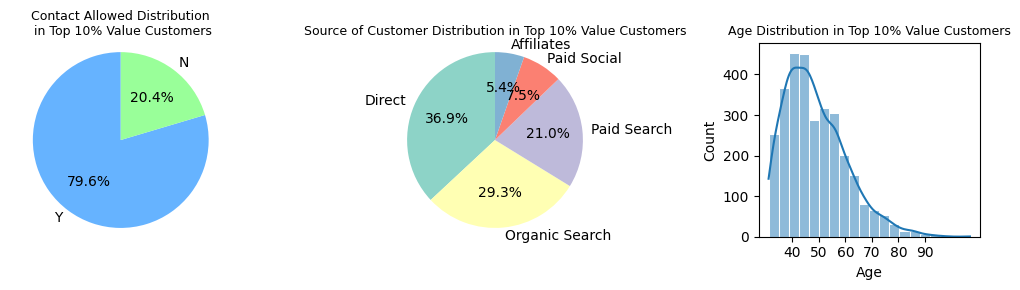

In [36]:
contact_allowed_counts = high_value_customers['Contact Allowed'].value_counts()
source_of_customer_counts = high_value_customers['Source of Customer'].value_counts()

fig, axes = plt.subplots(1, 3, figsize=(10, 3))

axes[0].pie(contact_allowed_counts, labels=contact_allowed_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99'])
axes[0].set_title('Contact Allowed Distribution\n in Top 10% Value Customers',fontsize=9)
axes[0].axis('equal')

colors_source = sns.color_palette('Set3', len(source_of_customer_counts))
axes[1].pie(source_of_customer_counts, labels=source_of_customer_counts.index, autopct='%1.1f%%', startangle=90, colors=colors_source)
axes[1].set_title('Source of Customer Distribution in Top 10% Value Customers',fontsize=9)
axes[1].axis('equal')

# Histogram for age distribution
sns.histplot(high_value_customers['Age'], bins=20, edgecolor='white', kde=True)
axes[2].set_title('Age Distribution in Top 10% Value Customers',fontsize=9)
axes[2].set_xlabel('Age')
axes[2].set_ylabel('Count')
axes[2].set_xticks([40, 50, 60, 70, 80, 90])  
plt.tight_layout()
plt.show()

### 2. Find actual high-value customers including promotions:

In [24]:
# Calculate the actual total profit including promotions
profit_by_customer['Actual Total Profit by customer'] = (
    profit_by_customer['1st Order Profit'] 
    + profit_by_customer['Subsequent Order Profit'] 
    - profit_by_customer['Total value of all promotions']
)

profit_by_customer_sorted_actual = profit_by_customer.sort_values(by='Actual Total Profit by customer', ascending=False)

top_10_percent_count_actual = int(len(profit_by_customer_sorted_actual) * 0.10)

high_value_customers_actual = profit_by_customer_sorted_actual.head(top_10_percent_count_actual)

high_value_customers_actual[['Customer ID','Age','Contact Allowed', 'Source of Customer', 'Actual Total Profit by customer']].head(5)

,Customer ID,Age,Contact Allowed,Source of Customer,Actual Total Profit by customer
8979,9230,47,Y,Organic Search,404.766720
29872,30704,57,Y,Organic Search,385.896941
18837,19362,60,Y,Organic Search,382.219200
19543,20087,56,Y,Organic Search,372.011641
28352,29141,65,Y,Direct,369.507378


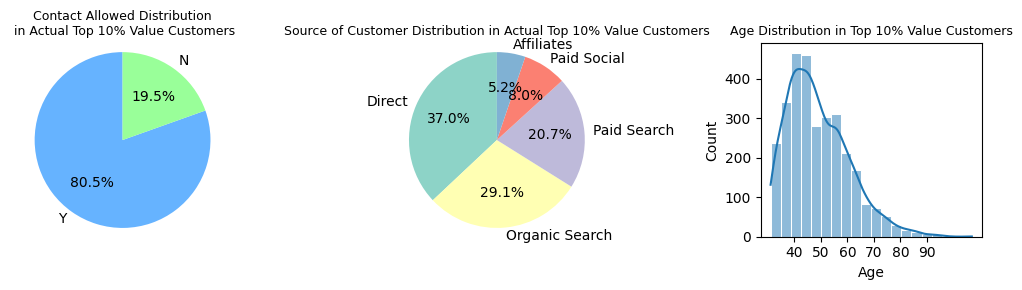

In [35]:
contact_allowed_counts_actual = high_value_customers_actual['Contact Allowed'].value_counts()
source_of_customer_counts_actual = high_value_customers_actual['Source of Customer'].value_counts()

fig, axes = plt.subplots(1, 3, figsize=(10, 3))

axes[0].pie(contact_allowed_counts_actual, labels=contact_allowed_counts_actual.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99'])
axes[0].set_title('Contact Allowed Distribution\n in Actual Top 10% Value Customers',fontsize=9)
axes[0].axis('equal')

colors_source = sns.color_palette('Set3', len(source_of_customer_counts_actual))
axes[1].pie(source_of_customer_counts_actual, labels=source_of_customer_counts_actual.index, autopct='%1.1f%%', startangle=90, colors=colors_source)
axes[1].set_title('Source of Customer Distribution in Actual Top 10% Value Customers',fontsize=9)
axes[1].axis('equal')

# Histogram for age distribution
sns.histplot(high_value_customers_actual['Age'], bins=20, edgecolor='white', kde=True)
axes[2].set_title('Age Distribution in Top 10% Value Customers',fontsize=9)
axes[2].set_xlabel('Age')
axes[2].set_ylabel('Count')
axes[2].set_xticks([40, 50, 60, 70, 80, 90])  

plt.tight_layout()
plt.show()

### 3. Summary:
#### - The high-value customers were predominantly male, with an average age around 40-50 years.
#### - Most of these customers came from direct and organic search, with 80% allowing contact, and had a strong tendency to repurchase.